# Logestic Regression ....

In [1]:
##  this is like classification problem

In [2]:
import pandas as pd


In [13]:
data = pd.read_csv("E:/train.csv")

In [14]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [15]:
import numpy as np

import matplotlib.pyplot as plt

import seaborn as snb

In [24]:
d =data


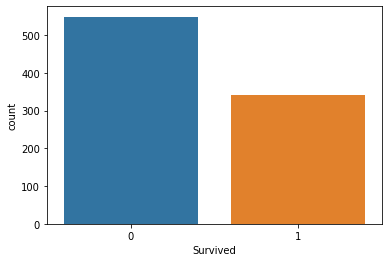

In [25]:
snb.countplot(x='Survived',data=d)

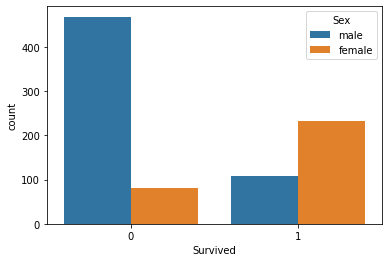

In [26]:
snb.countplot(x='Survived',hue='Sex',data=d)

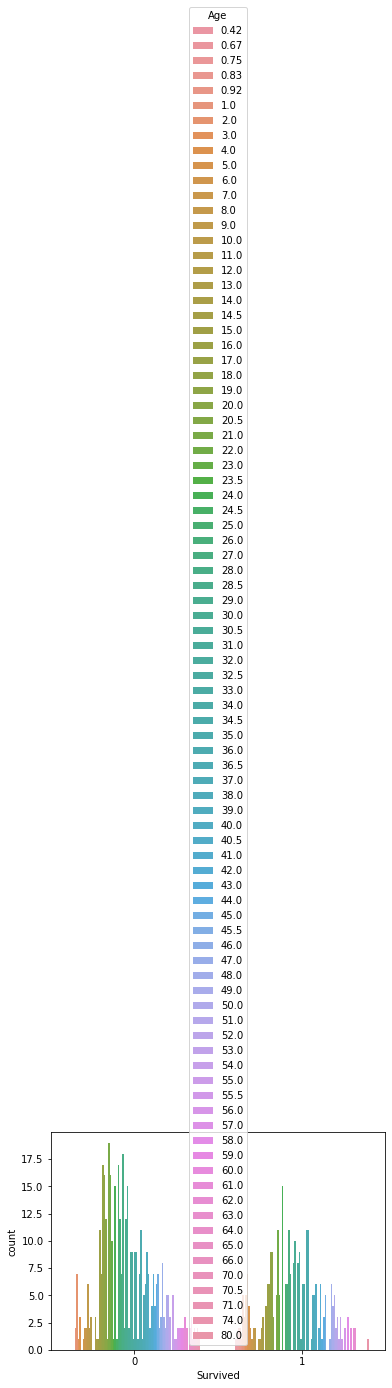

In [27]:
snb.countplot(x='Survived',hue='Age',data=d)

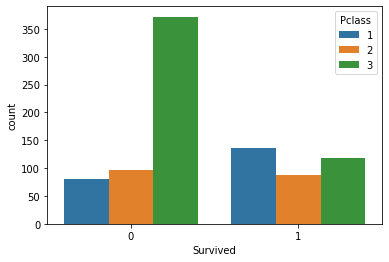

In [28]:
snb.countplot(x='Survived',hue='Pclass',data=d)

In [31]:
d.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
d =d.drop(columns=['PassengerId' , 'Name','Cabin','Embarked'])

In [36]:
d

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,male,22.0,1,0,A/5 21171,7.2500
1,1,1,female,38.0,1,0,PC 17599,71.2833
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,female,35.0,1,0,113803,53.1000
4,0,3,male,35.0,0,0,373450,8.0500
5,0,3,male,NaN,0,0,330877,8.4583
6,0,1,male,54.0,0,0,17463,51.8625
7,0,3,male,2.0,3,1,349909,21.0750
8,1,3,female,27.0,0,2,347742,11.1333
9,1,2,female,14.0,1,0,237736,30.0708


In [39]:
d=d.drop(columns=['Ticket'])

In [41]:
d.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [43]:
d.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [44]:
d.dropna(inplace=True)

In [45]:
d

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708
10,1,3,female,4.0,1,1,16.7000


In [46]:
d.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [47]:
d.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [51]:
sex = pd.get_dummies(d['Sex'],drop_first=True)

In [55]:
pclass = pd.get_dummies(d['Pclass'],drop_first=True)


In [66]:
#  d =pd.concat([d,sex,pclass],axis=1)
# d.head()

In [67]:
# d =d.drop(columns=['Sex','Pclass'])
# d.head()

In [74]:
d = d.drop(columns=['male'])

KeyError: "['male'] not found in axis"

In [78]:
 d =d.drop(columns=[2,3])

In [79]:
d

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500
6,0,54.0,0,0,51.8625
7,0,2.0,3,1,21.0750
8,1,27.0,0,2,11.1333
9,1,14.0,1,0,30.0708
10,1,4.0,1,1,16.7000


In [81]:
d = pd.concat([d,sex,pclass],axis=1)

In [84]:
d.head()

,Survived,Age,SibSp,Parch,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


In [85]:
y= d['Survived']
x = d.drop(columns=['Survived'])

In [87]:
x.head()

,Age,SibSp,Parch,Fare,male,2,3
0,22.0,1,0,7.2500,1,0,1
1,38.0,1,0,71.2833,0,0,0
2,26.0,0,0,7.9250,0,0,1
3,35.0,1,0,53.1000,0,0,0
4,35.0,0,0,8.0500,1,0,1


In [89]:
y = pd.DataFrame({'Survived':y})

In [90]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [94]:
print(x_train.shape)

(571, 7)


In [95]:
print(y_train.shape)

(571, 1)


In [96]:
print(x_test.shape)

(143, 7)


In [97]:
print(y_test.shape)

(143, 1)


In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
logmodel = LogisticRegression()

In [101]:
logmodel.fit(x_train , y_train)

c:\users\adars\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\adars\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
prediction = logmodel.predict(x_test)

In [103]:
prediction

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [104]:
y_test.head(10)

,Survived
689,1
278,0
506,1
9,1
494,0
149,0
473,1
467,0
795,0
864,0


In [105]:
pred = pd.DataFrame({'prediction':prediction})

In [107]:
pred.index = y_test.index

In [108]:
y_test.join(pred)

,Survived,prediction
689,1,1
278,0,0
506,1,1
9,1,1
494,0,0
149,0,0
473,1,1
467,0,0
795,0,0
864,0,0


# this is all about Logestic regression ... Almost 80% of prediction's are True ....
